In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
make_regression?

Object `make_regression` not found.


(50, 1)
(50, 1)


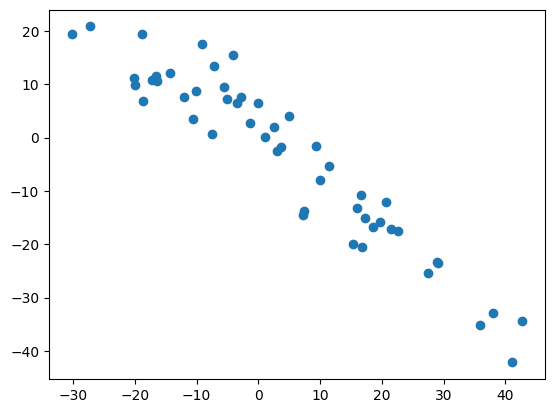

In [35]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(coef=True, n_samples=50, n_features = 1, n_informative=7, noise=5)
X *= -15

# X, y = datasets.load_boston(return_X_y=True)
y = np.array(y, ndmin=2).T
print(X.shape)
print(y.shape)
plt.scatter(X, y)

In [43]:
np.matrix(np.arange(4).reshape(2,2)).I.dot(np.arange(4).reshape(2,2))

matrix([[1., 0.],
        [0., 1.]])

In [36]:
class AnalyticLinregr():
    def fit(self, X, y):
        X = np.matrix(X)
        self.w = (X.T.dot(X)).I.dot(X.T).dot(y)

    def predict(self, y):
        return self.w * y



(40, 1)
self.w shape (1, 1)
----------
analytic model param is [[-0.82967414]] * x
----------
 sgd model param is [[-0.95175838]] * x + 1.0667128338884384
sk model param is [[-0.95175838]] * x + [1.06671283]


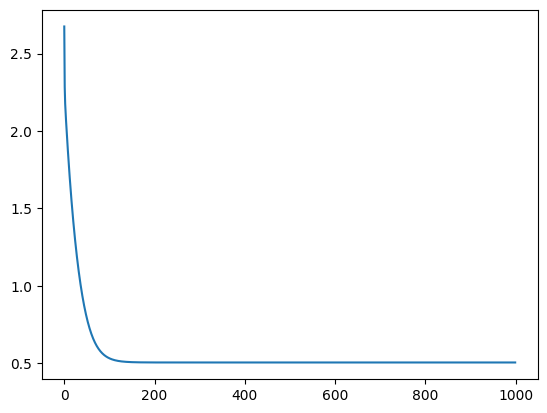

In [37]:
class LinRegressionGD(object):
  def __init__(self, eta=0.5, n_iter=1000):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w = np.array(np.random.rand(X.shape[1]),ndmin=2)
    print('self.w shape', self.w.shape)
    self.b = np.random.rand()
    self.costs = []
    sample_count = X.shape[0]
    for i in range(self.n_iter):
      output = np.matrix(self.net_input(X))

      errors = y - output
      remarka = (self.eta / sample_count) * np.dot(errors.T, X)
      self.w += remarka
      self.b += (self.eta / sample_count) * errors.sum()

      cost = np.linalg.norm(errors)
      self.costs.append(cost)
    return self

  def net_input(self, X):
    res = np.dot(X, self.w.T) + self.b
    return res

  def predict(self, X):
    return self.net_input(X)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.preprocessing import MinMaxScaler as Scaler
# from sklearn.preprocessing import MaxAbsScaler as Scaler
scalerX = Scaler().fit(np.array(X, ndmin=2))
scalery = Scaler().fit(np.array(y, ndmin=2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = scalerX.transform(X_train)
y_train = scalery.transform(np.array(y_train, ndmin=2))
X_test  = scalerX.transform(X_test)
y_test  = scalery.transform(y_test)


lm = LinearRegression()
lm.fit(X_train, y_train)

lrgd = LinRegressionGD()
print(y_train.shape)
lrgd.fit(X_train, y_train)

alr = AnalyticLinregr()
alr.fit(X, y)

print(f'----------\nanalytic model param is {alr.w} * x')
print(f'----------\n sgd model param is {lrgd.w} * x + {lrgd.b}')
print(f'sk model param is {lm.coef_} * x + {lm.intercept_}')
plt.plot(lrgd.costs)

In [12]:
my_predictions = lrgd.predict(X_test)
print(my_predictions.shape)
lm_predictions = lm.predict(X_test)
print(lm_predictions.shape)
np.linalg.norm(lm_predictions - y_test)
from sklearn.metrics import r2_score

r2_score(y_test, my_predictions)

(10, 1)
(10, 1)


-1.4110594387835168e+57

In [13]:
def get_rmse(y_actual, y_predicted):
    delta_sum  = 0
    for act, pred in zip(y_actual, y_predicted):
        delta_sum += (act-pred) ** 2
    return np.sqrt(delta_sum/len(y_actual))

In [14]:
print(get_rmse(y_test, lm_predictions))
print(get_rmse(y_test, my_predictions))

[0.01121661]
[7.90354299e+27]


In [15]:
class LinRegressionGD(object):
  def __init__(self, eta=0.5, n_iter=1000):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w = np.matrix(np.random.rand(X.shape[1])).T
#     self.w = np.matrix(1)
    # print('self.w shape', self.w.shape)
    self.b = np.random.rand()
    self.costs = []
    sample_count = X.shape[0]
    for i in range(self.n_iter):
      output = np.matrix(self.net_input(X))
      # print('output shape', output.shape)
      # print('y shape', y.shape)
      errors = y - output
      # print('errors shape', errors.shape)
#       print(f'errors is {errors}')
      # print('X shape', X.shape)
      remarka = (self.eta / sample_count) * np.dot(X.T, errors)
#       print(f'remarka is {remarka}')
      cost = np.linalg.norm(errors)
      self.costs.append(cost)
      # if cost > self.costs[-1]:
      #   remarka *= -1
      self.w += remarka
#       print('self.w shape', self.w.shape)
      self.b += (self.eta / sample_count) * errors.sum()
#
#       print('***********')
      #  * errors.sum()
      # bias += lr * np.dot(errors.T, output)

    return self

  def net_input(self, X):
    # print(X.T.shape)
    res = np.dot(X, self.w) + self.b
    # print('net input res shape', res.shape)
    return res

  def predict(self, X):
    return self.net_input(X)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression().fit(X_train, y_train)
lrgd = LinRegressionGD().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [17]:
my_predictions = lrgd.predict(X_test)
# print(my_predictions)
print(my_predictions.shape)
lr_predictions = lr.predict(X_test)
print(lr_predictions.shape)
# np.linalg.norm(lm_predictions - y_test)

(10, 1)
(10, 1)


[5.21550093]
[[nan]]


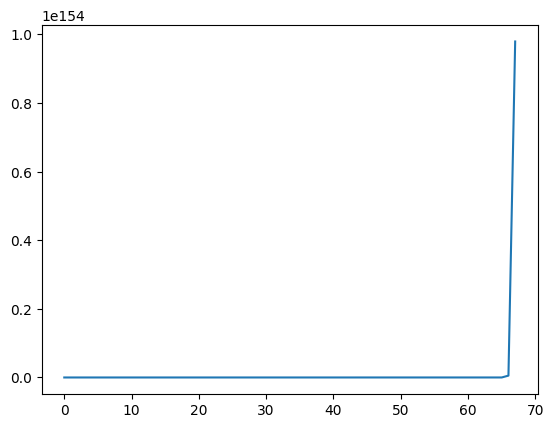

In [18]:
print(get_rmse(y_test, lr_predictions))
print(get_rmse(y_test, my_predictions))
plt.plot(lrgd.costs)

In [19]:
a = np.matrix(np.arange(1,5))
b = a
a.T.dot(b)

matrix([[ 1,  2,  3,  4],
        [ 2,  4,  6,  8],
        [ 3,  6,  9, 12],
        [ 4,  8, 12, 16]])

In [20]:
class LinRegressionGD(object):
  def __init__(self, eta=0.5, n_iter=1000):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w = np.matrix(np.random.rand(X.shape[1]))
#     self.w = np.matrix(1)
    print('self.w shape', self.w.shape)
    self.b = np.random.rand()
    self.costs = []
    sample_count = X.shape[0]
    for i in range(self.n_iter):
      output = np.matrix(self.net_input(X))
#       print('output shape', output.shape)
#       print('y shape', y.shape)
      errors = y - output
#       print('errors shape', errors.shape)
#       print(f'errors is {errors}')
#       print('X shape', X.shape)
      remarka = (self.eta / sample_count) * np.dot(errors.T, X)
#       print(f'remarka is {remarka}')
      self.w += remarka
#       print('self.w shape', self.w.shape)
      self.b += (self.eta / sample_count) * errors.sum()
#
#       print('***********')
      #  * errors.sum()
      # bias += lr * np.dot(errors.T, output)
      cost = np.linalg.norm(errors)
      self.costs.append(cost)
    return self

  def net_input(self, X):
    # print(X.T.shape)
    res = np.dot(X, self.w.T) + self.b
    # print('net input res shape', res.shape)
    return res

  def predict(self, X):
    return self.net_input(X)


In [21]:
a = [1,2,3,4]
a[-1]

4

In [22]:
a

[1, 2, 3, 4]